In [1]:
import pandas as pd


In [3]:
df_pacientes = pd.read_csv('C:/Users/sao/Desktop/Python/Datascience/datasets/Pacientes2.csv', index_col=0)
df_pacientes.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [4]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [5]:
#variables Predictoras
X = df_pacientes.iloc[:,1:11]

#Variables a predecir

Y = df_pacientes.iloc[:,0]

X.head()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


In [10]:
#Se divide nuestros datos en la tabla de testing y training
from sklearn.model_selection import train_test_split
#X_train y Y_train para entrenamiento
#Y_test y Y_test para prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)



In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738 entries, 731 to 28
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   HIPERTEN  738 non-null    int64
 1   HIPERGLU  738 non-null    int64
 2   HDLBAJA   738 non-null    int64
 3   HIPERTRI  738 non-null    int64
 4   CINTALTA  738 non-null    int64
 5   EDAD      738 non-null    int64
 6   GENERO    738 non-null    int64
 7   FUMA      738 non-null    int64
 8   ALCOHOL   738 non-null    int64
 9   POLIURIA  738 non-null    int64
dtypes: int64(10)
memory usage: 63.4 KB


creamos el modelo del arbol de decision

In [12]:
from sklearn.tree import DecisionTreeClassifier

#Llamamos al constructor del arbol de decision

arbol = DecisionTreeClassifier(max_depth=4) #max_depth sirve para colocar cuantos niveles queremos ver

arbol_enfermedad = arbol.fit(X_train, Y_train)



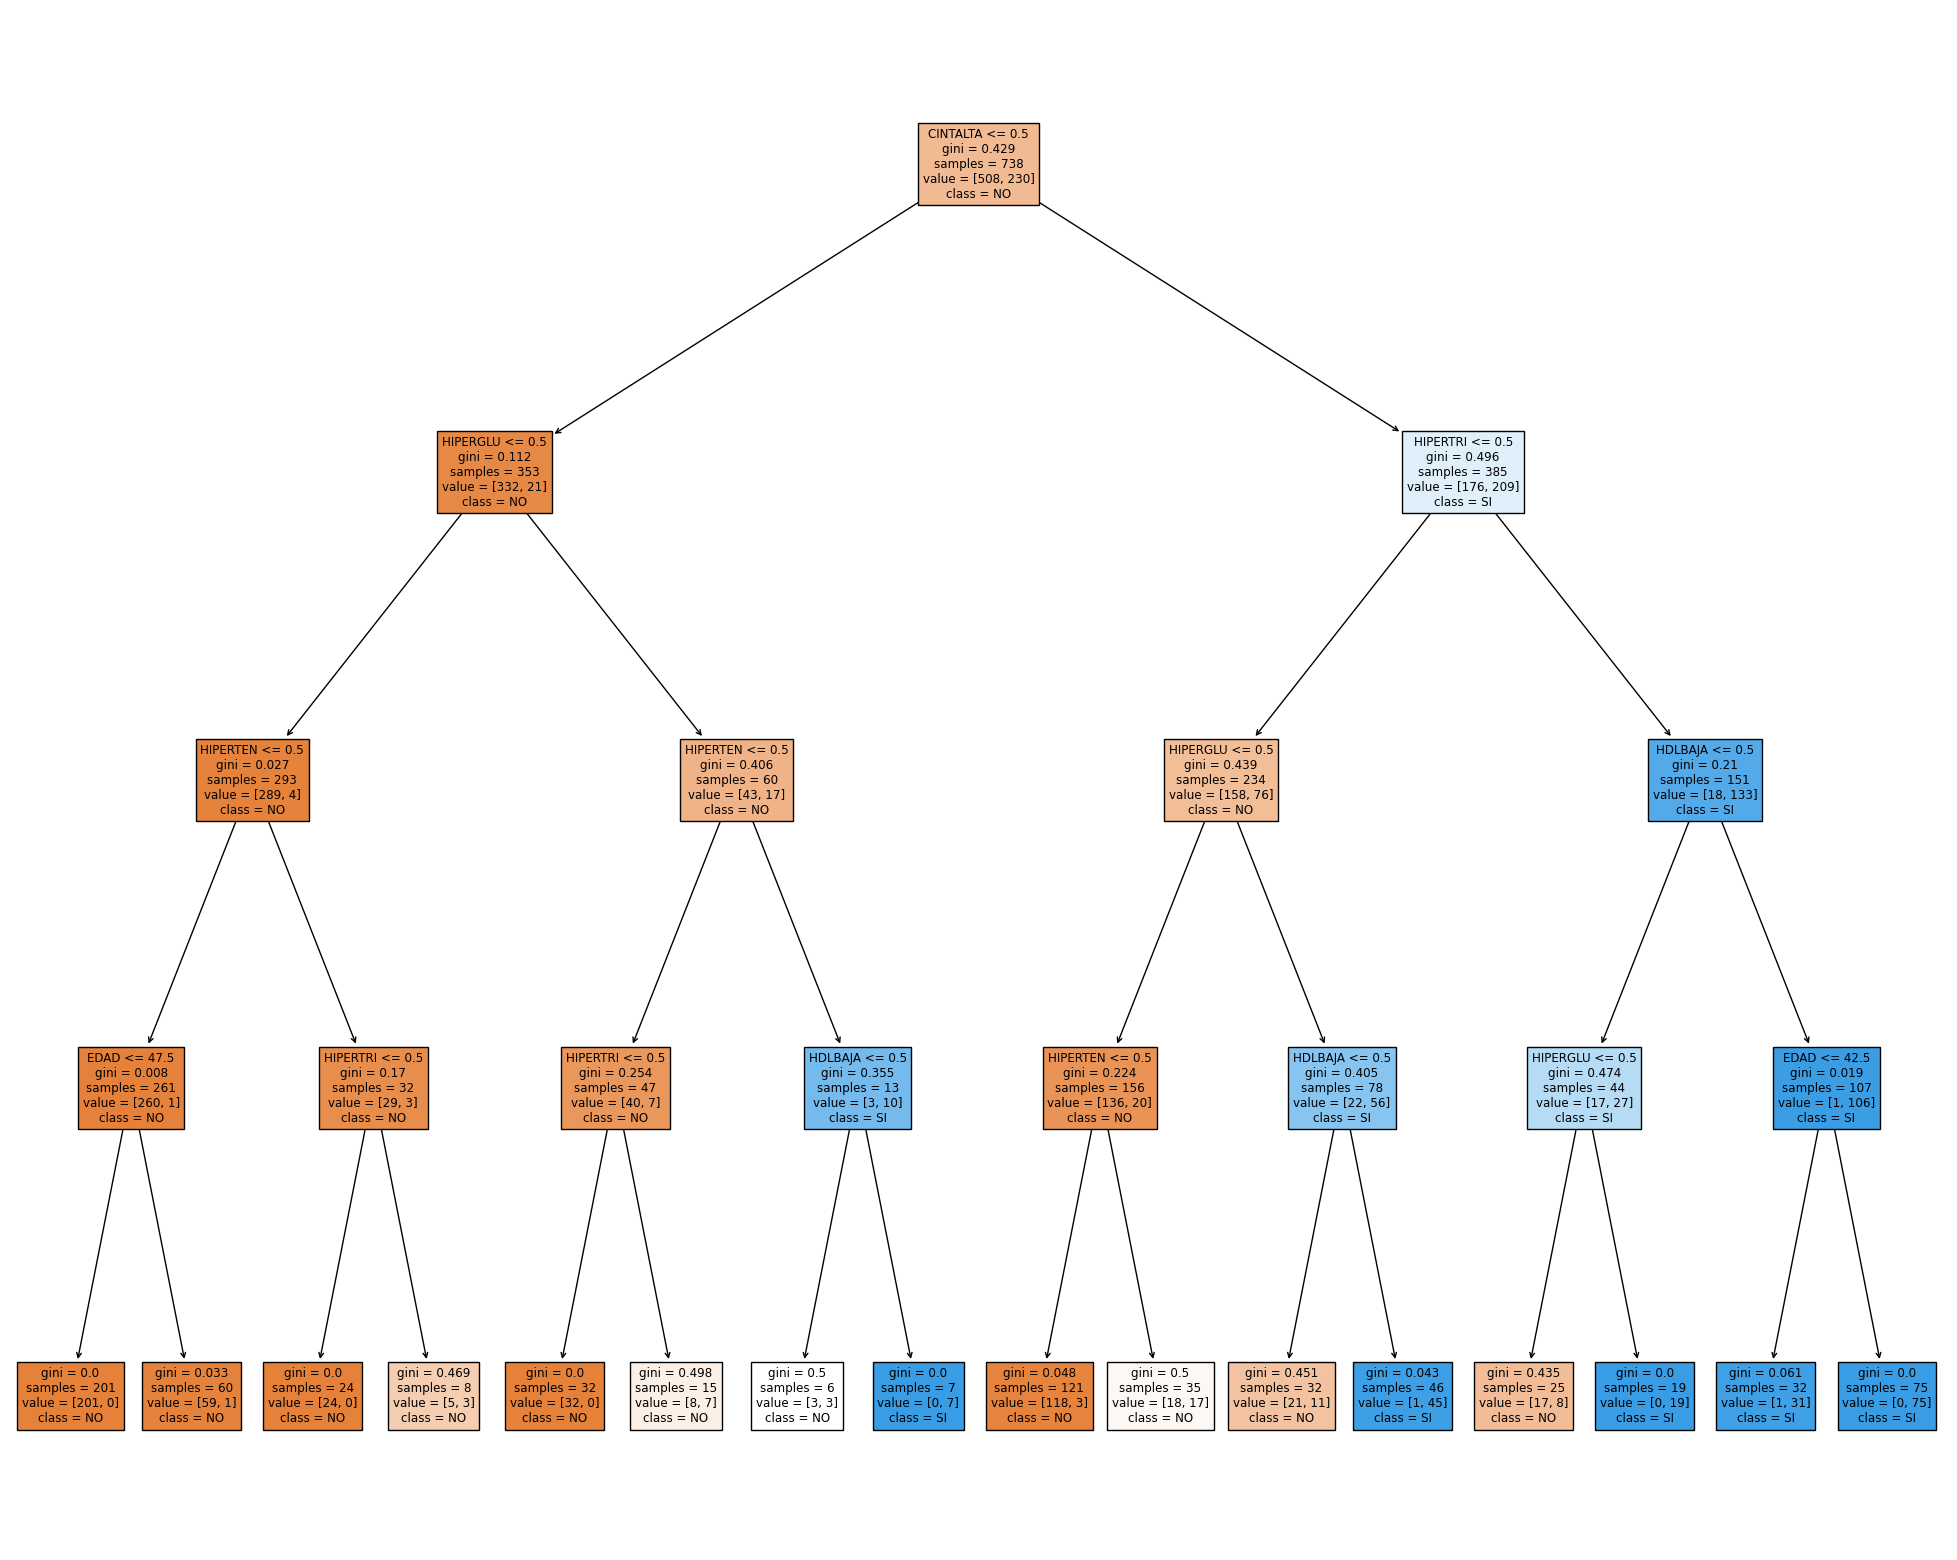

In [14]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20)) # le indicamos las dimensiones del grafico

tree.plot_tree(arbol_enfermedad, feature_names=list(X.columns.values), class_names=list(Y.values), filled=True)
plt.show()

Se lleva a cabo la predicción con los datos contenidos en la tabla de testing

In [15]:
# Predict the response for test dataset

y_pred = arbol_enfermedad.predict(X_test)

y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

se calcula la precisión del modelo

se crea la matriz de confusion



In [16]:
from sklearn.metrics import confusion_matrix
Matriz_de_Confusion = confusion_matrix(Y_test, y_pred)

Matriz_de_Confusion


array([[178,   3],
       [ 12,  54]], dtype=int64)

Se calcula la precision global del modelo

In [17]:
import numpy as np #Util para realizar calculos avanzados

precision_global = np.sum(Matriz_de_Confusion.diagonal())/np.sum(Matriz_de_Confusion)
precision_global

0.9392712550607287

# calculamos la precisión por clase

In [18]:
Precision_No = ((Matriz_de_Confusion[0,0]))/sum(Matriz_de_Confusion[0,])
Precision_No

0.9834254143646409